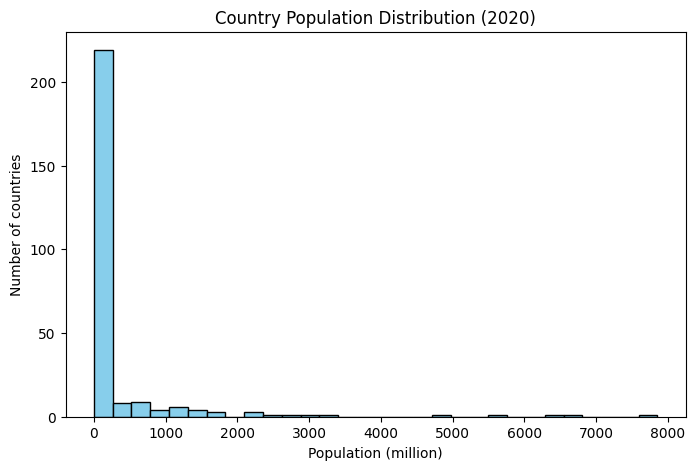

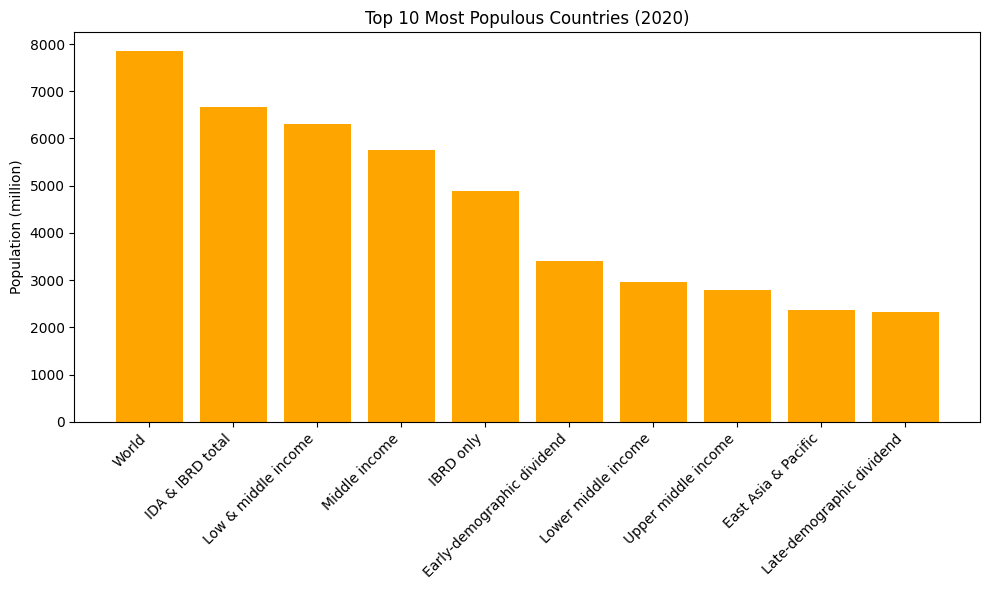

In [1]:
import requests, pandas as pd
import matplotlib.pyplot as plt

# Fetch data
url = "http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=20000"
r = requests.get(url)
df = pd.json_normalize(r.json()[1])

# Filter latest year (2020)
latest = df[df['date']=='2020'][['country.value','value']].dropna()
latest.columns = ['country','population']
latest['pop_m'] = latest['population'] / 1e6

# Histogram
plt.figure(figsize=(8,5))
plt.hist(latest['pop_m'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Population (million)')
plt.ylabel('Number of countries')
plt.title('Country Population Distribution (2020)')
plt.show()

# Bar chart (top 10)
top10 = latest.nlargest(10,'population')
plt.figure(figsize=(10,6))
plt.bar(top10['country'], top10['pop_m'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Population (million)')
plt.title('Top 10 Most Populous Countries (2020)')
plt.tight_layout()
plt.show()
